In [2]:
from pandas_datareader import data
import pandas as pd
from datetime import datetime
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [3]:
tickers = ['AAPL']

data_source = 'yahoo'

start_date = datetime(2016,1,1)
end_date = datetime(2020,1,20)



In [5]:
AAPL = data.DataReader(tickers[0], data_source, start_date, end_date)

In [6]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,107.029999,104.820000,107.010002,105.260002,40912300.0,98.362572
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868


In [ ]:
# Adj Close 수정 종가, 

In [7]:
AAPL.index

DatetimeIndex(['2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17'],
              dtype='datetime64[ns]', name='Date', length=1019, freq=None)

In [8]:
tickerList = ['AAPL','MS']

for tick in tickerList :
    vars() [tick] = data.DataReader(tick, data_source, start_date, end_date)

In [11]:
MS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,32.299999,31.770000,31.910000,31.809999,8154300.0,28.955408
2016-01-04,31.520000,30.559999,30.700001,31.480000,15749200.0,28.655018
2016-01-05,31.700001,30.930000,31.480000,31.280001,9850500.0,28.472967
2016-01-06,30.780001,30.250000,30.629999,30.500000,13057400.0,27.762959
2016-01-07,30.070000,28.780001,29.879999,28.980000,18138200.0,26.379364


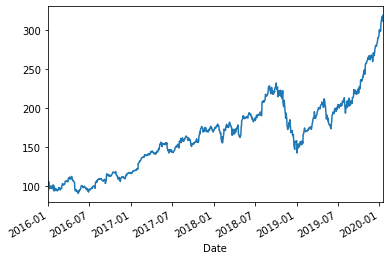

In [12]:
AAPL['Close'].plot()

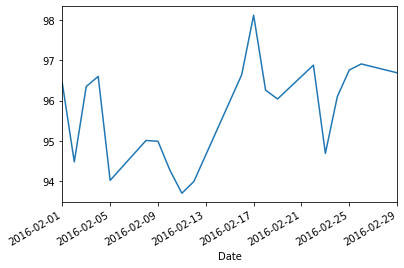

In [13]:
AAPL['2016-02']['Close'].plot()

In [14]:
AAPL['2016-01-01':'2016-06-30']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.446655
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,95.979675
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.101387
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.129868
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.606438
...,...,...,...,...,...,...
2016-06-24,94.660004,92.650002,92.910004,93.400002,75311400.0,88.287621
2016-06-27,93.050003,91.500000,93.000000,92.040001,45489600.0,87.002052
2016-06-28,93.660004,92.139999,92.900002,93.589996,40444900.0,88.467209


In [15]:
# 날자 bound가 넘으면 제대로 된 값을 주지 않음
AAPL['2016-01-01':'2016-06-31']

DateParseError: day is out of range for month

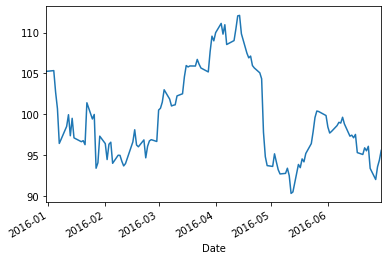

In [16]:
AAPL[:'2016-06-30']['Close'].plot()

In [17]:
AAPL['MA_5'] = AAPL['Close'].rolling(window=5).mean()
AAPL['MA_20'] = AAPL['Close'].rolling(window=20).mean()
AAPL['MA_60'] = AAPL['Close'].rolling(window=60).mean()
AAPL['MA_120'] = AAPL['Close'].rolling(window=120).mean()

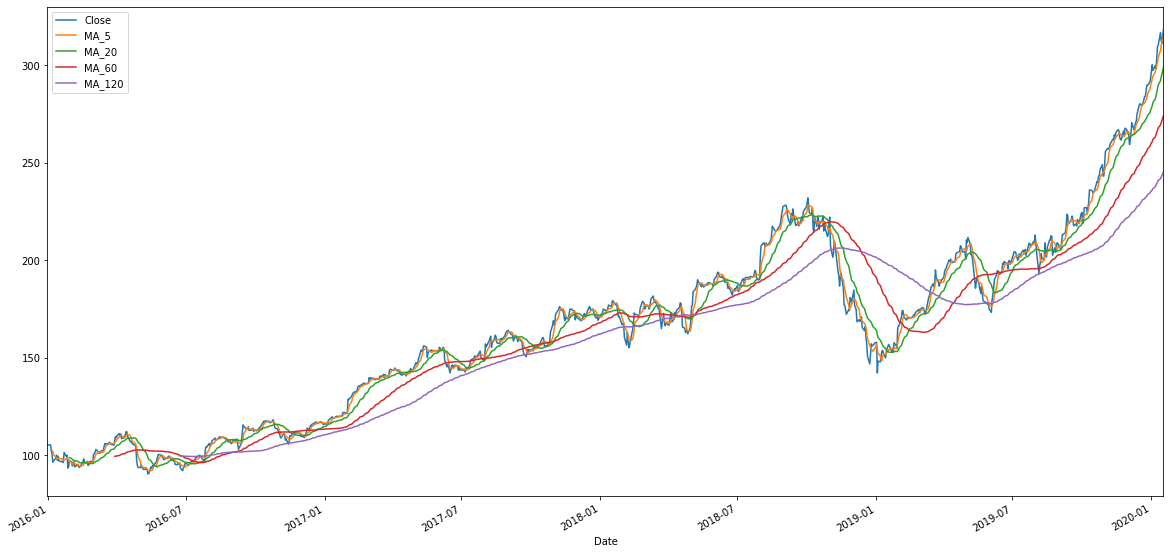

In [18]:
AAPL[['Close','MA_5','MA_20','MA_60','MA_120']].plot(figsize=(20,10))

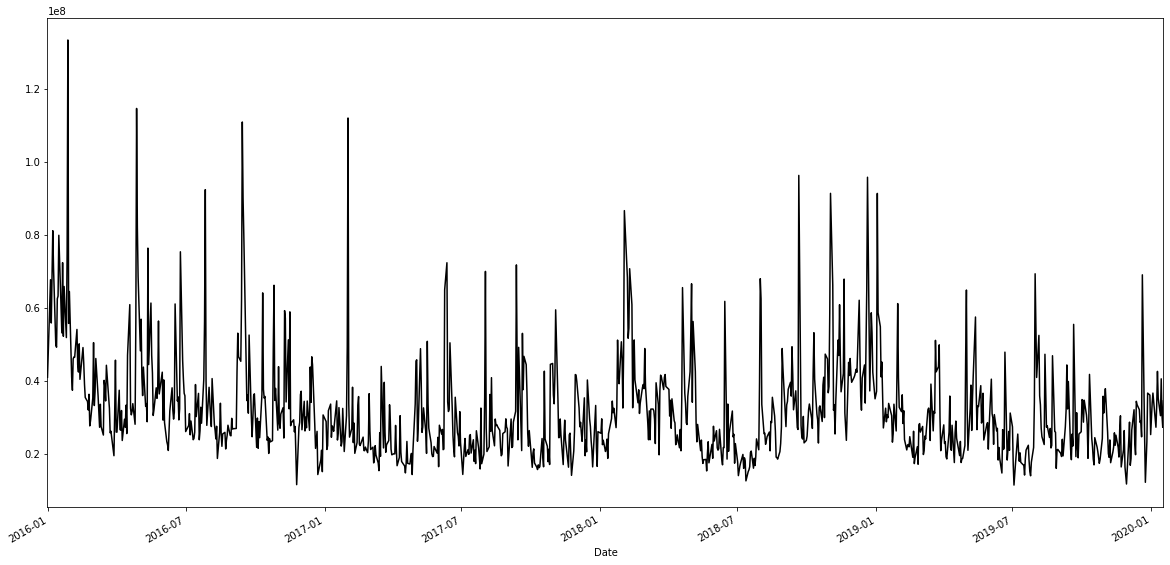

In [19]:
AAPL['Volume'].plot(figsize=(20,10), style="black")

In [ ]:
# MA_5 가 MA_120 보다 올라가면 golden_cross(buy time)
# MA_5 가 MA_120 보다 내려가면 dead_cross(sell time)

In [21]:
# AAPL['dif'] >0 (5이평이 60이평 위에 )
AAPL['dif'] = AAPL['MA_5'] - AAPL['MA_60']
AAPL['dif_1day_before'] = AAPL['dif'].shift(1)

# shift (같은 col의 전index값을 받아옴, 1만큼의)

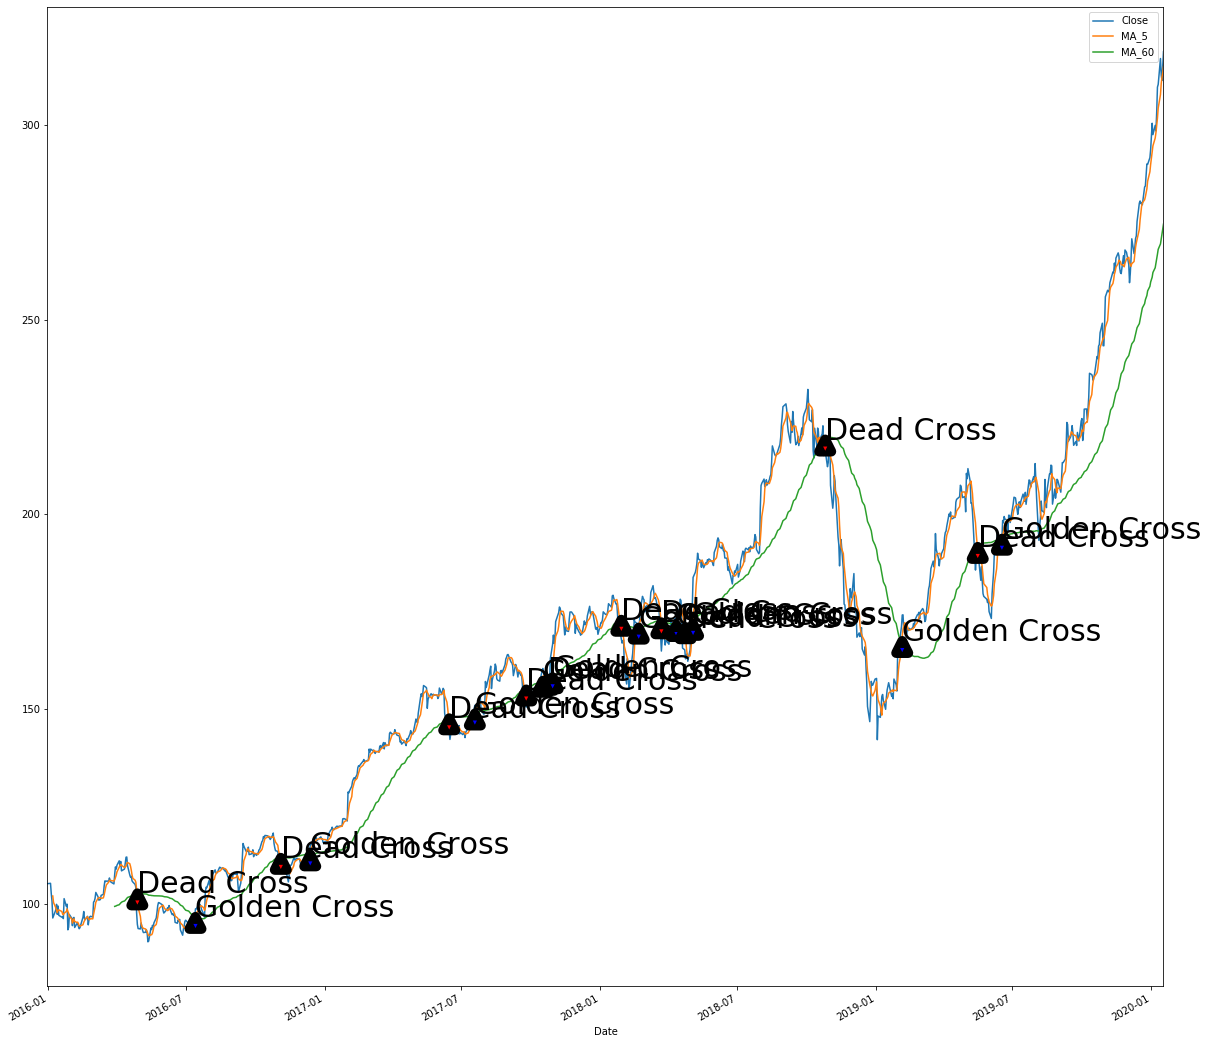

In [24]:
plt1 = AAPL[['Close','MA_5','MA_60']].plot(figsize=(20,20))

# idex를 이용하기 위해서 iteritems()
for index, vals in AAPL['dif'].iteritems() :
    now_val = AAPL.at[index,'dif']
    pre_val = AAPL.at[index,'dif_1day_before']
    
    if (now_val*pre_val <0) & (now_val >0) :
        plt.annotate('Golden Cross', fontsize=30,xy=(index,AAPL['MA_60'][index]),arrowprops=dict(facecolor='blue', linewidth = 10))
    elif (now_val*pre_val <0) & (now_val <0) :
        plt.annotate('Dead Cross', fontsize=30,xy=(index,AAPL['MA_60'][index]),arrowprops=dict(facecolor='red', linewidth = 10))

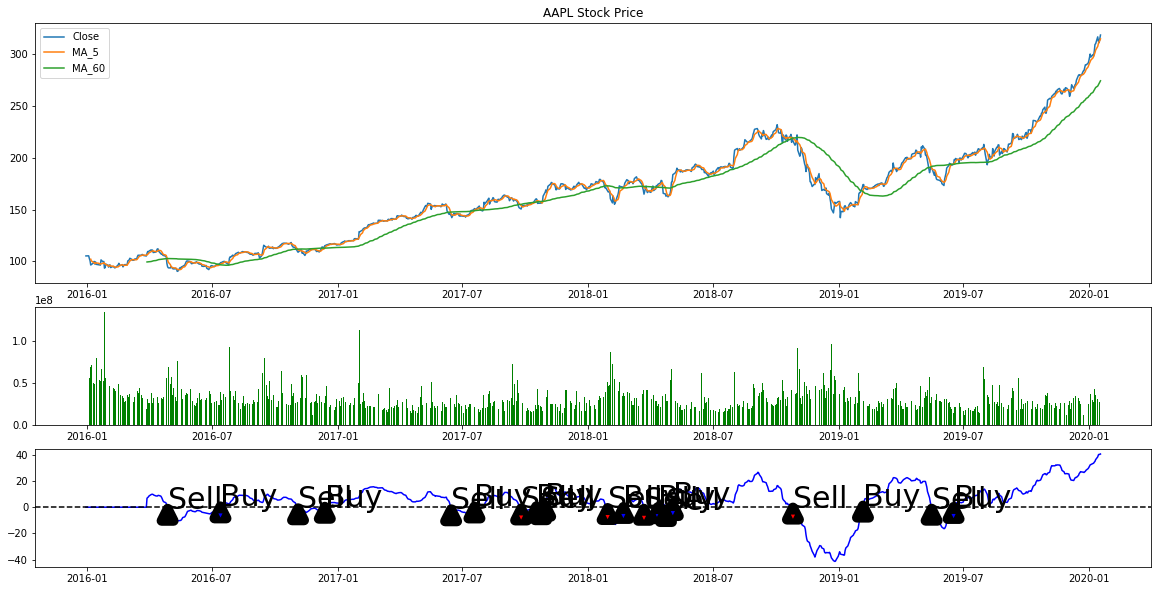

In [27]:
fig = plt.figure(figsize=(20,10))

pricechartplt = plt.subplot2grid((4,1), (0,0), rowspan=2)
pricechartplt.plot(AAPL.index, AAPL['Close'], label='Close')
pricechartplt.plot(AAPL.index, AAPL['MA_5'], label='MA_5')
pricechartplt.plot(AAPL.index, AAPL['MA_60'], label='MA_60')
plt.title('AAPL Stock Price')
plt.legend(loc='best')

volchart = plt.subplot2grid((4,1),(2,0), rowspan=1)
volchart.bar(AAPL.index, AAPL['Volume'], color='green')

sigchart = plt.subplot2grid((4,1),(3,0), rowspan=1)
sigchart.plot(AAPL.index, AAPL['dif'].fillna(0), color='blue')
plt.axhline(y=0, linestyle='--', color='black')

for index, vals in AAPL['dif'].iteritems() :
    now_val = AAPL.at[index,'dif']
    pre_val = AAPL.at[index,'dif_1day_before']
    
    if (now_val*pre_val <0) & (now_val >0) :
        sigchart.annotate('Buy', fontsize=30,xy=(index,AAPL['dif'][index]),arrowprops=dict(facecolor='blue', linewidth = 10))
    elif (now_val*pre_val <0) & (now_val <0) :
        sigchart.annotate('Sell', fontsize=30,xy=(index,AAPL['dif'][index]),arrowprops=dict(facecolor='red', linewidth = 10))